In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Import the dataset

In [2]:
df = pd.read_csv('../raw_data/news.csv')

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.shape

(6335, 4)

In [5]:
labels = df['label']
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [6]:
labels.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

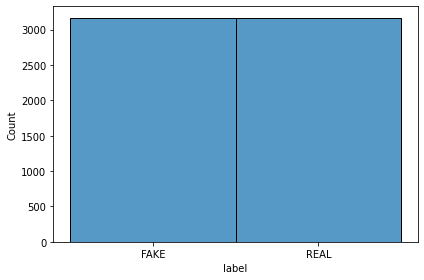

In [7]:
sns.histplot(labels)
plt.tight_layout()

## Split the dataset

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size=0.3, random_state=0)

## Train the model

In [9]:
# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(x_train) 
tfidf_test = tfidf_vectorizer.transform(x_test)

In [10]:
# Initialize a PassiveAggressiveClassifier
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

## Predict and evaluate performance

In [11]:
# Predict on the test set and calculate accuracy
y_pred = model.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.95%


In [12]:
# Build confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['FAKE','REAL'])
conf_matrix

array([[865,  68],
       [ 66, 902]])

## Conclusion

In [13]:
print(f'''
So with this model, we have: 
{conf_matrix[0,0]} true positives, 
{conf_matrix[1,1]} true negatives, 
{conf_matrix[1,0]} false positives, and 
{conf_matrix[0,1]} false negatives.
''')


So with this model, we have: 
865 true positives, 
902 true negatives, 
66 false positives, and 
68 false negatives.

